In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
#load data
data = pd.read_csv('datasets/world_population.csv')

In [4]:
#data exploration
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## Data Cleaning

In [5]:
#check for null values
data.isnull().sum().sum()

0

In [6]:
#check data types
print('shape: ' ,data.shape)
print('data types: ' ,data.dtypes)

shape:  (234, 17)
data types:  Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object


In [7]:
data.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

The data looks to be cleaned already, there are no null values present or heterogrenous data types in columns. I'll proceed to plot some graphs to get a better understanding of these trends. 

## Data Visualization

In [13]:
#sort data by rank
data.sort_values(by='Rank', inplace=True)
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


<AxesSubplot: xlabel='Country'>

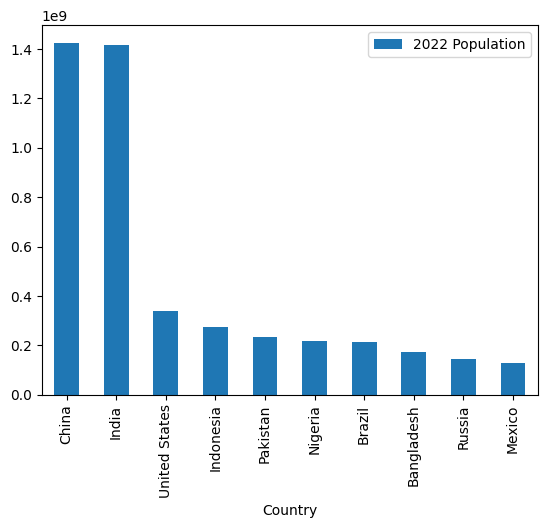

In [9]:
#plot 2022 population for top 10 countries
top_ten = data.head(10)
top_ten.plot(x='Country', y='2022 Population', kind='bar')

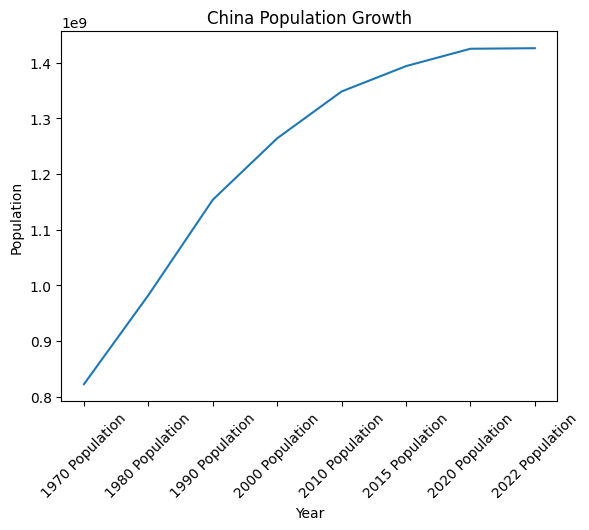

In [10]:
#plot country with greatest population growth
china = data.loc[data['Rank'] == 1]
pop_cols = ['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']
plt.plot(china[pop_cols].columns.values, china[pop_cols].values[0])
plt.xticks(rotation = 45)
plt.title('China Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

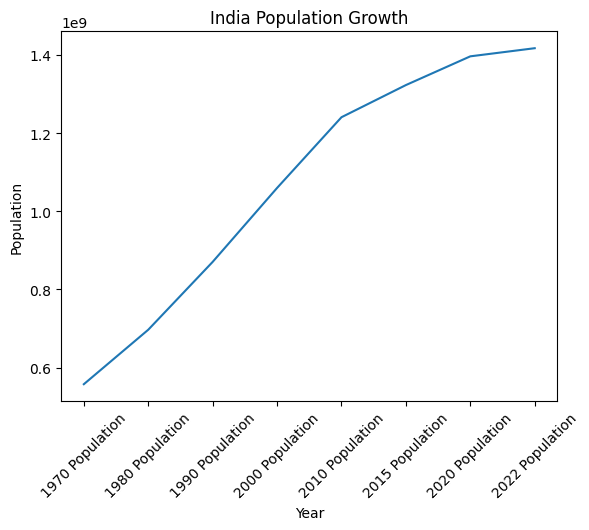

In [11]:
#plot country with rank 2
india = data.loc[data['Rank'] == 2]
plt.plot(india[pop_cols].columns.values, india[pop_cols].values[0])
plt.xticks(rotation = 45)
plt.title('India Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

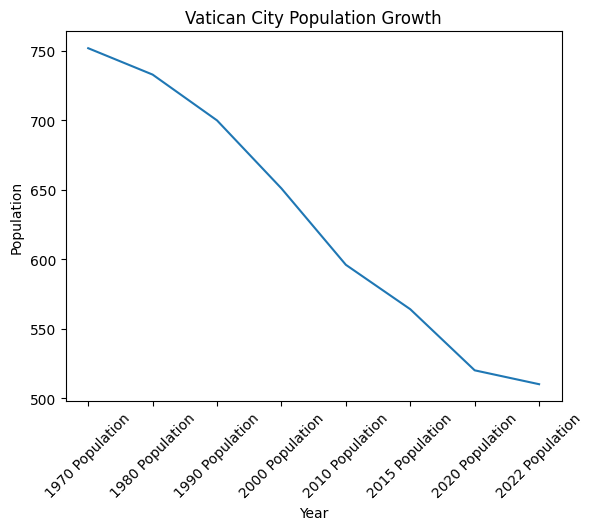

In [12]:
#plot country with lowest population
last = data.loc[data['Rank'] == data['Rank'].max()]
last_country = last['Country'].values[0]
plt.plot(last[pop_cols].columns.values, last[pop_cols].values[0])
plt.xticks(rotation = 45)
plt.title(f'{last_country} Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

With India and China, there was an upward trend throughout the years. However, with Vatican City the population decreases. Interesting fact: there are no hospitals in Vatican City so no births are recorded there; they also consume the most wine per head in the world. 